# TASK 1 

# DATA CLEANING AND PREPROCESSING

## importing libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('data.csv')

##  Given Data

In [17]:
df

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,10-16:00,23.75,12.667,93.450,1178.252,276.955,347.286,310.970,1.523,513.956,...,61.141,330.117,304.006,148.174,1027.201,1357.271,381.643,45.264,252.947,30.86
320,9-19:00,19.80,12.558,94.352,1184.119,297.071,399.135,319.576,1.451,570.058,...,67.667,330.848,304.616,165.178,906.962,1311.177,25.494,50.528,252.092,30.70
321,9-20:00,23.01,12.550,90.842,1188.517,289.826,373.633,314.591,1.457,549.306,...,66.446,330.226,304.686,160.841,887.125,1319.226,0.638,45.549,252.438,NaN
322,9-21:00,24.32,13.083,88.910,1192.879,318.006,364.081,308.559,1.523,504.852,...,61.054,327.346,304.363,147.589,804.423,1320.225,0.000,43.725,253.176,31.13


In [18]:
df.shape

(324, 23)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      324 non-null    object 
 1   Y-Kappa          324 non-null    float64
 2   ChipRate         319 non-null    float64
 3   BF-CMratio       307 non-null    float64
 4   BlowFlow         308 non-null    float64
 5   ChipLevel4       323 non-null    float64
 6   T-upperExt-2     322 non-null    float64
 7   T-lowerExt-2     322 non-null    float64
 8   UCZAA            299 non-null    float64
 9   WhiteFlow-4      323 non-null    float64
 10  AAWhiteSt-4      173 non-null    float64
 11  AA-Wood-4        323 non-null    float64
 12  ChipMoisture-4   323 non-null    float64
 13  SteamFlow-4      323 non-null    float64
 14  Lower-HeatT-3    322 non-null    float64
 15  Upper-HeatT-3    322 non-null    float64
 16  ChipMass-4       323 non-null    float64
 17  WeakLiquorF     

In [20]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Y-Kappa,324.0,20.635370,3.070036,12.170,18.38250,20.8450,23.03250,27.600
ChipRate,319.0,14.347937,1.499095,9.983,13.35800,14.3080,15.51700,16.958
BF-CMratio,307.0,87.464456,7.995012,68.645,81.82300,86.7390,92.37200,121.717
BlowFlow,308.0,1237.837614,100.593735,0.000,1193.21525,1273.1385,1289.19600,1351.240
ChipLevel4,323.0,258.164483,87.987452,0.000,213.52700,271.7920,321.68000,419.014
T-upperExt-2,322.0,356.904295,9.209290,339.168,350.24125,356.8430,362.24225,399.135
T-lowerExt-2,322.0,324.020180,7.621402,284.633,321.42000,325.6690,329.17500,337.012
UCZAA,299.0,1.492010,0.105923,1.182,1.43150,1.4980,1.56050,1.747
WhiteFlow-4,323.0,591.732260,67.016351,405.111,540.98950,592.8950,639.48050,731.394
AAWhiteSt-4,173.0,6.140410,0.081609,5.890,6.08900,6.1350,6.19900,6.340


In [74]:
df.isnull().sum()

Observation          0
Y-Kappa              0
ChipRate             4
BF-CMratio          14
BlowFlow            13
ChipLevel4           1
T-upperExt-2         1
T-lowerExt-2         1
UCZAA               24
WhiteFlow-4          1
AAWhiteSt-4        141
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        1
Upper-HeatT-3        1
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          1
WeakWashF            1
SteamHeatF-3         1
T-Top-Chips-4        1
SulphidityL-4      141
dtype: int64

## DROPPING DUPLICATES

In [93]:
df = df.drop_duplicates()
df=df.reset_index(drop=True)
df

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,12-09:00,20.90,15.167,84.640,1283.706,339.440,354.803,311.041,1.635,532.419,...,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833,30.29
297,12-10:00,24.98,NaN,85.034,1278.345,368.564,357.723,321.387,NaN,520.365,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.47
298,12-11:00,21.00,NaN,88.013,1307.722,278.842,357.438,323.757,NaN,553.070,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,NaN
299,12-12:00,21.40,NaN,85.490,1255.986,273.484,361.365,322.689,NaN,590.199,...,71.456,333.032,308.732,174.069,986.206,1348.747,457.313,53.194,251.324,30.46


In [94]:
df.shape

(301, 23)

## CHECKING OUTLIERS

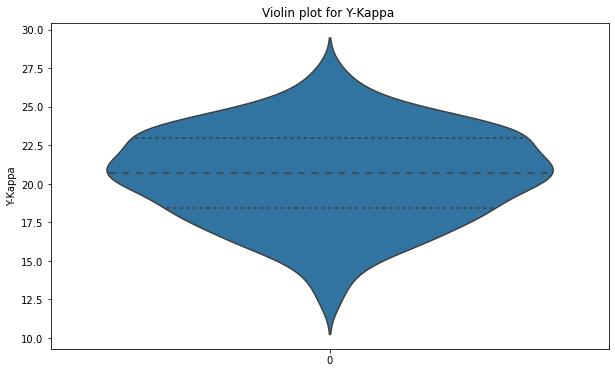

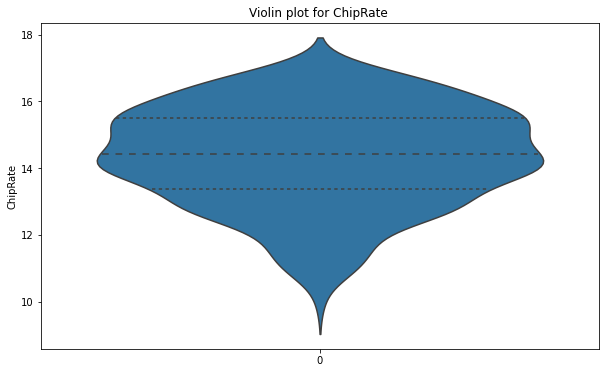

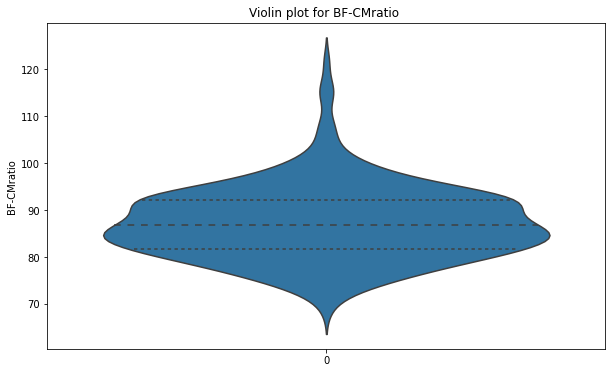

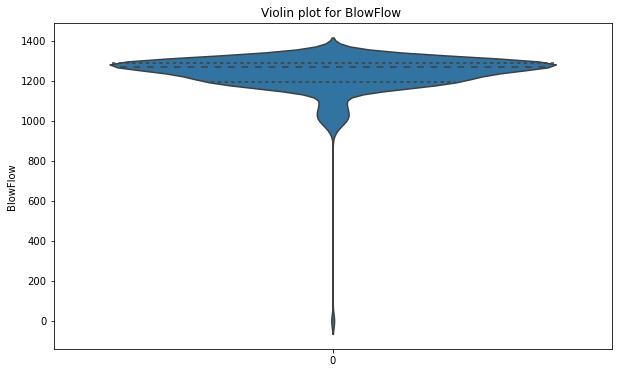

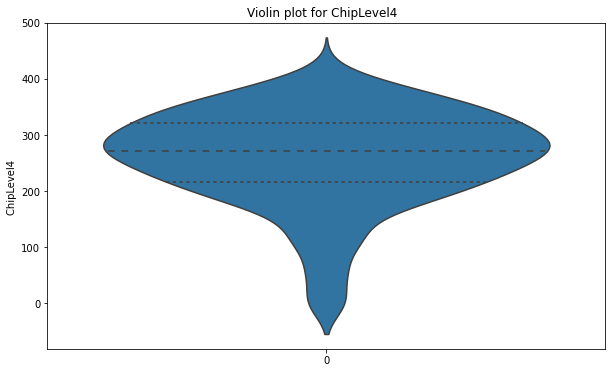

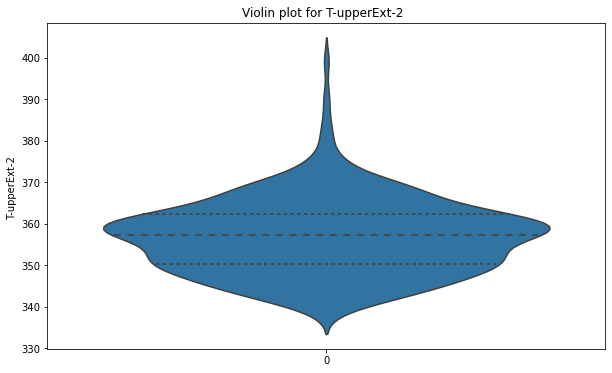

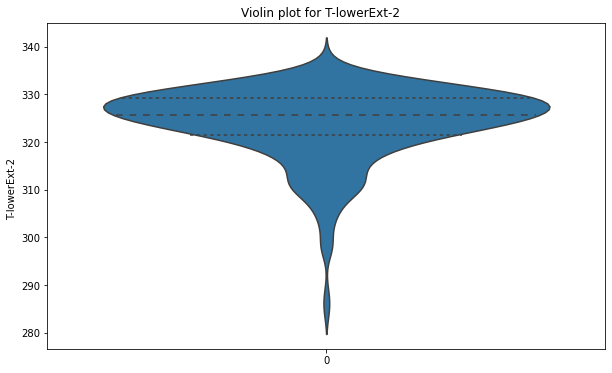

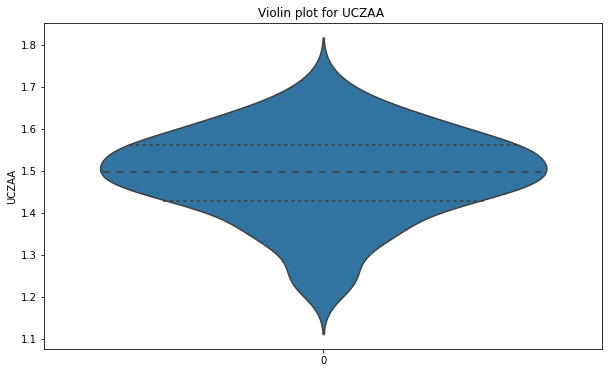

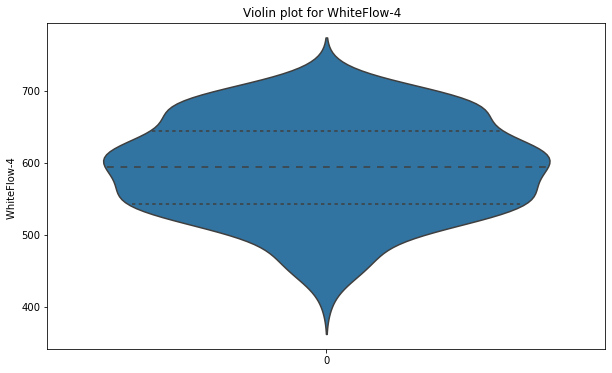

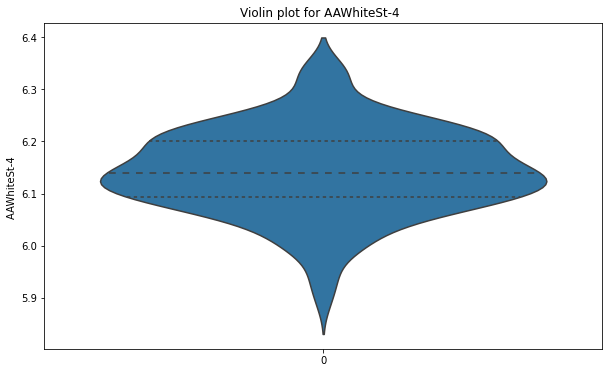

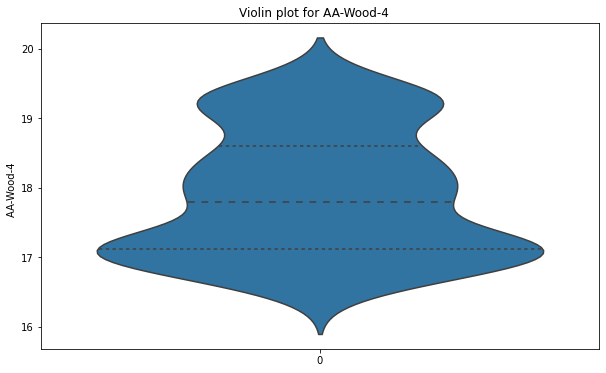

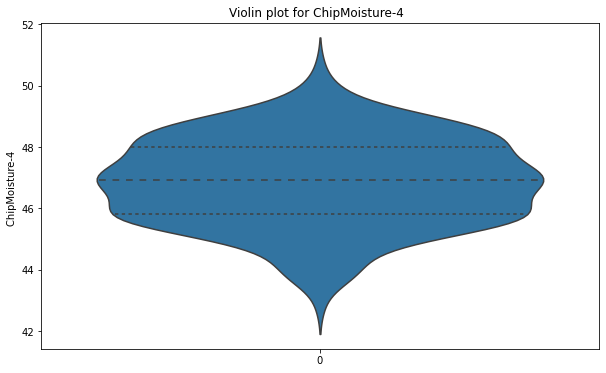

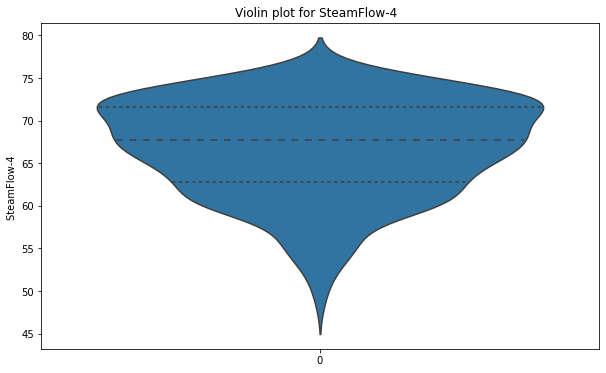

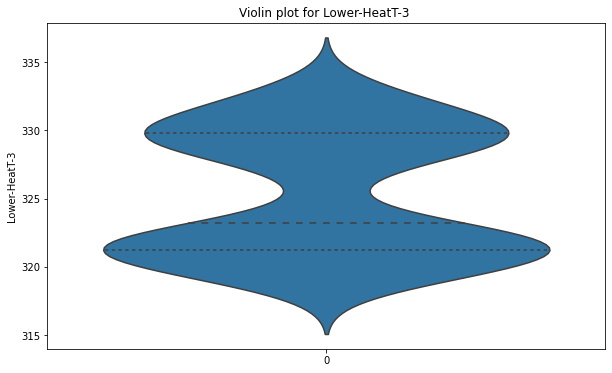

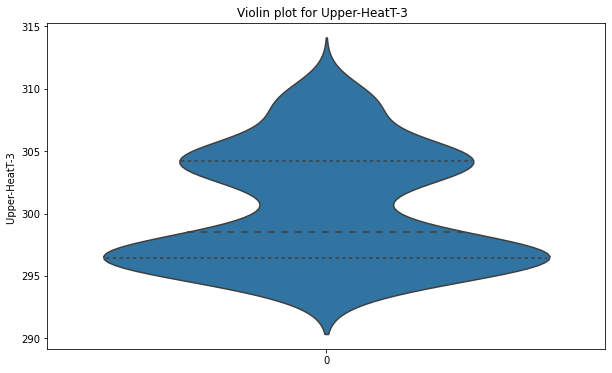

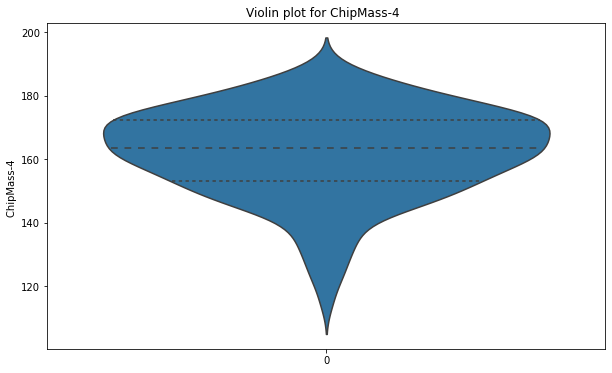

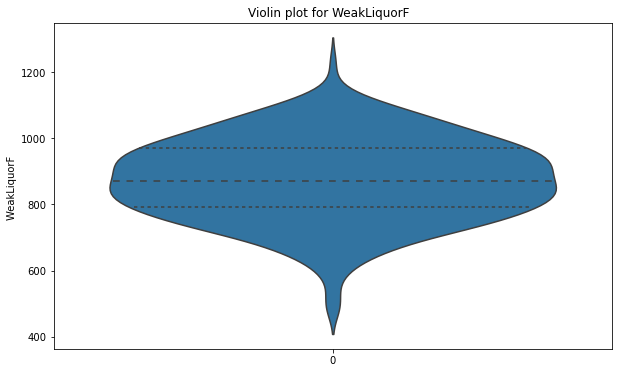

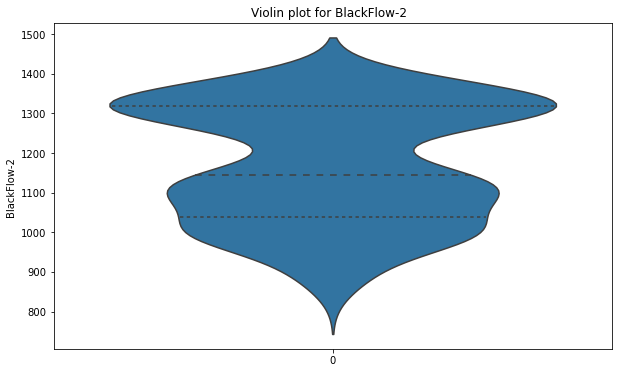

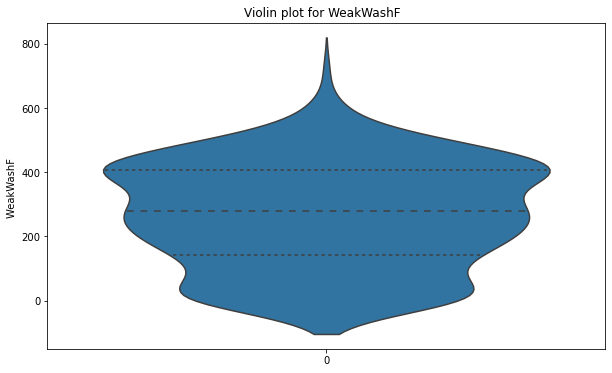

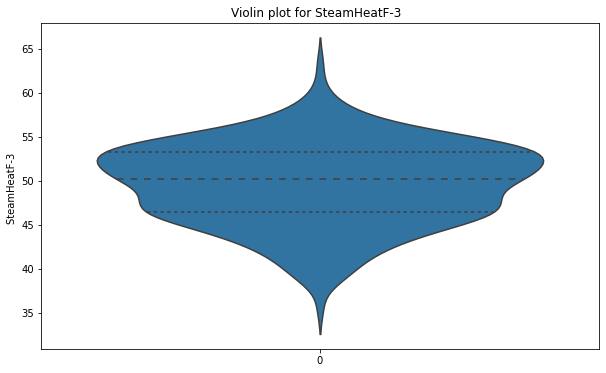

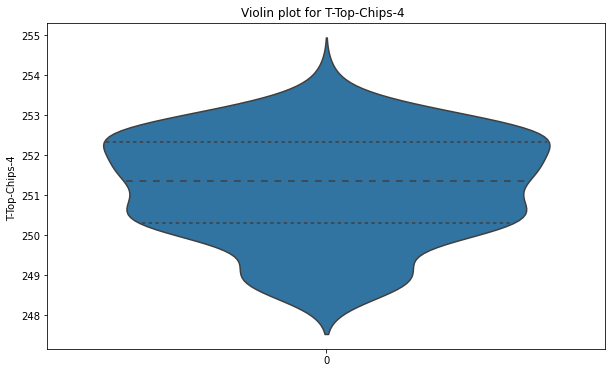

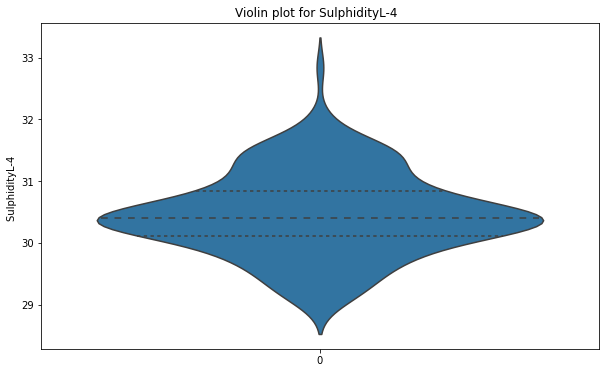

In [95]:
numerical_columns=df.select_dtypes(include=['float']).columns
for column in df[numerical_columns]:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df[column], inner="quartile")
    plt.title(f'Violin plot for {column} ')
    plt.ylabel(column)
    plt.show()

## TRIMMING OUTLIERS

In [97]:
import numpy as np
def trim_outliers_iqr(data, lower_percentile=25, upper_percentile=75, trim_value=1.5):
    numerical_columns=data.select_dtypes(include=['float']).columns
    q1 = np.percentile(df[numerical_columns], lower_percentile)
    q3 = np.percentile(df[numerical_columns], upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - trim_value * iqr
    upper_bound = q3 + trim_value * iqr
    return np.clip(data, lower_bound, upper_bound)


trimmed_data = trim_outliers_iqr(df)
trimmed_data


,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,12-09:00,20.90,15.167,84.640,1283.706,339.440,354.803,311.041,1.635,532.419,...,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833,30.29
297,12-10:00,24.98,NaN,85.034,1278.345,368.564,357.723,321.387,NaN,520.365,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.47
298,12-11:00,21.00,NaN,88.013,1307.722,278.842,357.438,323.757,NaN,553.070,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,NaN
299,12-12:00,21.40,NaN,85.490,1255.986,273.484,361.365,322.689,NaN,590.199,...,71.456,333.032,308.732,174.069,986.206,1348.747,457.313,53.194,251.324,30.46


## HANDELING MISSING VALUES

In [99]:
def knn_impute(df, n_neighbors=10):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    filled_data = pd.DataFrame(imputer.fit_transform(df[numerical_columns]), columns=df.columns)
    return filled_data

# Apply KNN imputation
filled_data = knn_impute(df[numerical_columns])
print("\nData after KNN imputation:")
filled_data


Data after KNN imputation:


,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,23.10,16.5200,121.717,1177.607,169.805,358.282,329.545,1.4430,599.253,6.1207,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,31.142
1,27.60,16.8100,79.022,1328.360,341.327,351.050,329.067,1.5490,537.201,6.0760,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.110
2,23.19,16.7090,79.562,1329.407,239.161,350.022,329.260,1.6000,549.611,6.0918,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,29.618
3,23.60,16.4780,81.011,1334.877,213.527,350.938,331.142,1.6040,623.362,6.0540,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.020
4,22.90,15.6180,93.244,1334.168,243.131,351.640,332.709,1.5410,638.672,6.1100,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,20.90,15.1670,84.640,1283.706,339.440,354.803,311.041,1.6350,532.419,6.3400,...,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833,30.290
297,24.98,14.0743,85.034,1278.345,368.564,357.723,321.387,1.5616,520.365,6.2200,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.470
298,21.00,14.5176,88.013,1307.722,278.842,357.438,323.757,1.5599,553.070,6.1577,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,30.485
299,21.40,14.3083,85.490,1255.986,273.484,361.365,322.689,1.5477,590.199,6.2300,...,71.456,333.032,308.732,174.069,986.206,1348.747,457.313,53.194,251.324,30.460


In [100]:
filled_data.isnull().sum()

Y-Kappa            0
ChipRate           0
BF-CMratio         0
BlowFlow           0
ChipLevel4         0
T-upperExt-2       0
T-lowerExt-2       0
UCZAA              0
WhiteFlow-4        0
AAWhiteSt-4        0
AA-Wood-4          0
ChipMoisture-4     0
SteamFlow-4        0
Lower-HeatT-3      0
Upper-HeatT-3      0
ChipMass-4         0
WeakLiquorF        0
BlackFlow-2        0
WeakWashF          0
SteamHeatF-3       0
T-Top-Chips-4      0
SulphidityL-4      0
dtype: int64

## SCALING DATA

In [111]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(filled_data), columns=filled_data.columns)

scaled_data

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,0.847817,1.477247,4.496219,-0.554158,-1.046868,0.151201,0.722908,-0.469630,0.095125,-0.334867,...,0.054731,0.875098,0.584435,0.984719,2.050892,0.996658,-0.057159,1.077016,0.653982,1.225906
1,2.354962,1.673433,-1.074182,0.941498,0.961541,-0.658255,0.660270,0.534069,-0.832759,-1.024536,...,-1.206645,1.175725,0.968531,0.080072,-1.703102,0.850746,-0.156231,-0.671348,0.133937,-2.557045
2,0.877960,1.605106,-1.003729,0.951886,-0.234755,-0.773316,0.685561,1.016980,-0.647188,-0.780761,...,-0.977433,0.811990,0.645718,0.137560,-1.609020,1.050618,-0.180227,0.462065,0.078909,-1.611307
3,1.015278,1.448834,-0.814678,1.006155,-0.534912,-0.670791,0.932183,1.054856,0.455635,-1.363971,...,0.298491,0.754717,0.402097,1.376222,-0.873893,1.033079,-0.166688,1.128098,-0.713947,-2.724597
4,0.780833,0.867040,0.781357,0.999121,-0.188269,-0.592218,1.137525,0.458318,0.684570,-0.499956,...,0.569217,0.641685,0.121578,1.549326,0.107658,1.160458,-0.314630,0.984020,-1.020859,-2.743214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.110991,0.561936,-0.341204,0.498475,0.939445,-0.238193,-1.701894,1.348390,-0.904266,3.048677,...,-0.222204,1.629799,1.561290,-1.189000,-0.344411,1.169083,0.750402,-0.033694,0.464875,-0.360253
297,1.477469,-0.177280,-0.289799,0.445287,1.280468,0.088634,-0.346133,0.653376,-1.084513,1.197216,...,-0.192399,1.543133,1.462676,-0.746317,0.247580,1.167478,0.934933,-0.336913,0.295143,-0.025149
298,0.144483,0.122614,0.098870,0.736744,0.229883,0.056735,-0.035563,0.637279,-0.595464,0.236000,...,-0.180690,1.270819,1.296738,-0.291938,0.272421,1.168277,1.203329,1.024842,-0.028045,0.002776
299,0.278452,-0.018978,-0.230305,0.223458,0.167144,0.496272,-0.175516,0.521759,-0.040262,1.351505,...,0.823621,1.653140,1.799947,0.850390,0.903333,1.196214,1.170194,0.767466,0.070384,-0.043766


## FINAL DATA 

In [103]:
final_data = pd.concat([trimmed_data["Observation"],scaled_data], axis=1)
#print("\nFinal data after concatenation:")
final_data

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,0.847817,1.477247,4.496219,-0.554158,-1.046868,0.151201,0.722908,-0.469630,0.095125,...,0.054731,0.875098,0.584435,0.984719,2.050892,0.996658,-0.057159,1.077016,0.653982,1.225906
1,31-01:00,2.354962,1.673433,-1.074182,0.941498,0.961541,-0.658255,0.660270,0.534069,-0.832759,...,-1.206645,1.175725,0.968531,0.080072,-1.703102,0.850746,-0.156231,-0.671348,0.133937,-2.557045
2,31-02:00,0.877960,1.605106,-1.003729,0.951886,-0.234755,-0.773316,0.685561,1.016980,-0.647188,...,-0.977433,0.811990,0.645718,0.137560,-1.609020,1.050618,-0.180227,0.462065,0.078909,-1.611307
3,31-03:00,1.015278,1.448834,-0.814678,1.006155,-0.534912,-0.670791,0.932183,1.054856,0.455635,...,0.298491,0.754717,0.402097,1.376222,-0.873893,1.033079,-0.166688,1.128098,-0.713947,-2.724597
4,31-04:00,0.780833,0.867040,0.781357,0.999121,-0.188269,-0.592218,1.137525,0.458318,0.684570,...,0.569217,0.641685,0.121578,1.549326,0.107658,1.160458,-0.314630,0.984020,-1.020859,-2.743214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,12-09:00,0.110991,0.561936,-0.341204,0.498475,0.939445,-0.238193,-1.701894,1.348390,-0.904266,...,-0.222204,1.629799,1.561290,-1.189000,-0.344411,1.169083,0.750402,-0.033694,0.464875,-0.360253
297,12-10:00,1.477469,-0.177280,-0.289799,0.445287,1.280468,0.088634,-0.346133,0.653376,-1.084513,...,-0.192399,1.543133,1.462676,-0.746317,0.247580,1.167478,0.934933,-0.336913,0.295143,-0.025149
298,12-11:00,0.144483,0.122614,0.098870,0.736744,0.229883,0.056735,-0.035563,0.637279,-0.595464,...,-0.180690,1.270819,1.296738,-0.291938,0.272421,1.168277,1.203329,1.024842,-0.028045,0.002776
299,12-12:00,0.278452,-0.018978,-0.230305,0.223458,0.167144,0.496272,-0.175516,0.521759,-0.040262,...,0.823621,1.653140,1.799947,0.850390,0.903333,1.196214,1.170194,0.767466,0.070384,-0.043766
